In [1]:
# This is a good example of how to use Linear Regression single variable with data in SQL Server tables
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn import tree
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
import pyodbc

# STEP 1: get your data from SQL Server and assign it to a pandas variable
conn_str = pyodbc.connect('Driver={SQL Server};' 'Server=LAPTOP-CHKIB79A;''Database=Tutorial;''Trusted_Connection=yes;')
query_str = "SELECT * FROM [Tutorial].[dbo].[TitanicActual] Where Age is not null"
df = pd.read_sql(sql=query_str, con=conn_str)
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,None,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3,7.9250,None,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,None,S


## Let's determine x independent variables. For example, will your sex, Age, Fare etc etc  affect your survival rate?

In [2]:
# STEP 2: 
# Is your survival dependent on your Passenger Class i.e. First Class, Second Class Passenger etc etc? 
# We can coclusively say that you are 3 times more likely to die if you are  in 3rd class cabin and more likely to survive if you are in first class cabin.

df4 = df.groupby(["Survived","Pclass"]).agg({'Pclass': ['count']})
df4

Pclass
                 count
Survived Pclass       
0        1          55
         2          68
         3         207
1        1          91
         2          67
         3          67

In [3]:
# Is your survival dependent on fare paid? 
# We can coclusively say that you have a better chance of surviving if your fare was high. This fits in perfectly well with the passenger class above.
df5 = df.groupby(["Survived"]).agg({'Fare': ['mean']})
df5

,Fare
,mean
Survived,
0,24.967094
1,49.461205


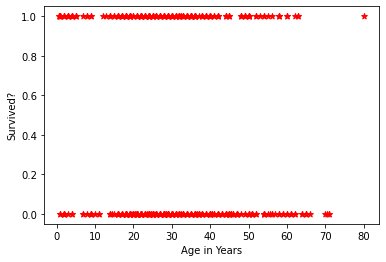

In [4]:
# As can be seen from the scattered plot, you cannot conclusively say that Age was a factor when considering survival of passengers.
# We will explore more options to finally conclude whether Age was a factor.
plt.xlabel('Age in Years')
plt.ylabel('Survived?')
plt.scatter(df.Age,df.Survived, color = 'red', marker= '*')

In [5]:
# Let's use AgeBand. Note that this method authomatically takes care of null Age.

# add AgeBand column
#pd.set_option('mode.chained_assignment', None) # use with caution. To get rid of warning
df2 = df
df2["AgeBand"] = "Band 8"
df2["AgeBand"][df2["Age"] < 10] = "Band 1"
df2["AgeBand"][ (df2["Age"] >= 10)  &(df2["Age"] < 20 )] = "Band 2"
df2["AgeBand"][ (df2["Age"] >= 20) & (df2["Age"] < 30) ] = "Band 3"
df2["AgeBand"][ (df2["Age"] >= 30) & (df2["Age"] < 40) ] = "Band 4"
df2["AgeBand"][ (df2["Age"] >= 40) & (df2["Age"] < 50) ] = "Band 5"
df2["AgeBand"][ (df2["Age"] >= 50) & (df2["Age"] < 60) ] = "Band 6"
df2["AgeBand"][ (df2["Age"] >= 60) & (df2["Age"] < 70) ] = "Band 7"
df2.head()

C:\Users\tej_j\AppData\Roaming\Python\Python36\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\Users\tej_j\AppData\Roaming\Python\Python36\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\tej_j\AppData\Roaming\Python\Python36\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
C:\U

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeBand
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,None,S,Band 3
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Band 4
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3,7.9250,None,S,Band 3
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Band 4
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,None,S,Band 4


In [6]:
df3 = df2.groupby(["Survived","AgeBand"]).agg({'AgeBand': ['count']})
df3

# From using AgeBand with groupby, we can conclusively say that :
# You are more like to survive if you are less than 10 years old (Band 1) oherwise, you are more likely to be dead.




AgeBand
                   count
Survived AgeBand        
0        Band 1       19
         Band 2       45
         Band 3      112
         Band 4       66
         Band 5       46
         Band 6       25
         Band 7       13
         Band 8        4
1        Band 1       28
         Band 2       31
         Band 3       62
         Band 4       59
         Band 5       24
         Band 6       15
         Band 7        5
         Band 8        1

In [7]:
# Is your survival dependent on your gender?  Going the SQL way, if you are more comfortable with SQL
# We can coclusively say that you are 4 times more likely to survive if you are female.
conn_str = pyodbc.connect('Driver={SQL Server};' 'Server=LAPTOP-CHKIB79A;''Database=Tutorial;''Trusted_Connection=yes;')
query_str1 = "SELECT * FROM [Tutorial].[dbo].[SurvivalStats]" # table loaded from LoadSurvival Stored Procedure
df1 = pd.read_sql(sql=query_str1, con=conn_str)
df1.head()

,MaleSurvived,TotalMale,PercentageOfMaleSurvived,FemaledSurvived,TotalFemale,PercentageOfFemaleSurvived,TotalPassenger,PercentageOfFemale,PercentageOfMale
0,85.0,449.0,18.930958,186.0,251.0,74.103586,700.0,35.857143,64.142857


## Now that we know our independent variables x to be Age,Sex,Fare and PClass, we have to convert sex from text to an integer. We can either use get_dummies or LabelEncoder

In [8]:
# STEP 3:
# Let's convert sex from text to an integer using LabelEncoder
le_sex = LabelEncoder() # get LabelEncoder() class
df['sex_n'] = le_sex.fit_transform(df['Sex']) # add new column sex_n to your dataframe and fit transform
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeBand,sex_n
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,None,S,Band 3,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Band 4,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3,7.9250,None,S,Band 3,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Band 4,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,None,S,Band 4,1


In [9]:
x = df.drop(['PassengerId', 'Survived','Name','Sex','SibSp','Parch','Ticket','Cabin','Embarked','AgeBand'], axis = 'columns')
x.head(5)

,Pclass,Age,Fare,sex_n
0,3,22.0,7.2500,1
1,1,38.0,71.2833,0
2,3,26.0,7.9250,0
3,1,35.0,53.1000,0
4,3,35.0,8.0500,1


In [10]:
y = df.Survived
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [11]:
# STEP 4: train and fit your model to use available datasets.

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0) 
reg = tree.DecisionTreeClassifier() # get decision tree classification object
reg.fit(x_train,y_train) # fit your decision tree classification object model. 

DecisionTreeClassifier()

In [12]:
# let's make some prediction and check accuracy of the model

y_predict = reg.predict(x_test)
print("The predictions are :",y_predict)

test_predict = reg.predict([[1,52,80,0]])
print("The prediction for first class passenger, 52 years old female that paid £80 is :"  ,test_predict)
r2 = reg.score(x_test,y_test)
print("The accuracy of the model is :" ,r2)

The predictions are : [0 1 1 0 0 1 0 0 0 1 1 0 0 1 0 1 0 0 1 1 1 0 0 0 0 1 0 1 0 0 1 1 0 0 0 0 0
 1 1 0 0 0 0 1 0 1 0 0 1 0 0 1 0 1 1 0 0 1 0 0 0 1 0 0 1 1 0 0 0 1 0 1 1 0
 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1 1 0 0 0 1 1 1 0 0 1 0 0 0 1 0 0 0 1 1 1 1 0
 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 1 1 1 1 0 0 0 1 1 0 0 1 0 0 0 1 0 1 1 0 0 0
 1 1 0 1 1 1 0 0 0 1 1 0 0 1 1 1 0 0 0]
The prediction for first class passenger, 52 years old female that paid £80 is : [1]
The accuracy of the model is : 0.7664670658682635


## The accuracy of the model is 75%. Is there anything we can do to improve this accuracy?

In [13]:
# Let's try and drop Age from the model and rebuild the model?

x1 = x.drop(['Age'], axis = 'columns')
x1.head()

,Pclass,Fare,sex_n
0,3,7.2500,1
1,1,71.2833,0
2,3,7.9250,0
3,1,53.1000,0
4,3,8.0500,1


In [14]:
x_train, x_test, y_train, y_test = train_test_split(x1, y, test_size=0.3, random_state=0) 
reg1 = tree.DecisionTreeClassifier() # get decision tree classification object
reg1.fit(x_train,y_train) # fit your decision tree classification object model. 

DecisionTreeClassifier()

In [15]:
# let's make some prediction and check accuracy of the new model.
# The accuracy of the new model without Age is 80%. 
 
y_predict1 = reg1.predict(x_test)
print("The predictions are :",y_predict1)

test_predict = reg1.predict([[1,80,0]])
print("The prediction for first class female passenger that paid £80 is :"  ,test_predict)
r = reg1.score(x_test,y_test)
print("The accuracy of the model is :" ,r)

The predictions are : [0 0 0 0 1 0 0 0 0 1 1 0 0 1 0 0 0 0 1 1 1 0 0 0 0 1 0 1 1 0 0 1 0 0 1 0 0
 1 0 0 0 0 0 1 0 1 1 0 0 0 0 1 0 1 0 0 0 1 0 0 0 1 0 0 1 1 0 0 0 1 0 1 1 0
 0 0 1 0 0 0 1 0 0 0 0 1 0 0 1 1 0 0 0 1 1 1 0 0 1 0 0 0 0 0 0 0 0 1 1 1 0
 0 1 0 0 0 0 0 0 1 0 1 1 0 1 0 0 1 1 0 0 1 0 0 1 0 0 1 0 0 0 1 0 1 0 1 0 0
 1 1 0 1 0 1 0 0 0 1 0 0 0 1 0 1 0 0 1]
The prediction for first class female passenger that paid £80 is : [1]
The accuracy of the model is : 0.8023952095808383


## We know that excluding Age improves the model. What happened if we use AgeBand instead of Age in the model?

In [16]:
# Let's convert AgeBand from text to an integer using LabelEncoder
df_n = df2
le_age = LabelEncoder() # get LabelEncoder() class
df_n['Age_n'] = le_age.fit_transform(df['AgeBand']) # add new column le_age to your dataframe and fit transform
df_n.head(6)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeBand,sex_n,Age_n
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,None,S,Band 3,1,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Band 4,0,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3,7.9250,None,S,Band 3,0,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Band 4,0,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,None,S,Band 4,1,3
5,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,Band 6,1,5


In [17]:
# Let's add AgeBand to our new x

x2 = pd.concat([x1,df_n.Age_n], axis = 'columns')
x2.head()

,Pclass,Fare,sex_n,Age_n
0,3,7.2500,1,2
1,1,71.2833,0,3
2,3,7.9250,0,2
3,1,53.1000,0,3
4,3,8.0500,1,3


In [18]:
x_train, x_test, y_train, y_test = train_test_split(x2, y, test_size=0.3, random_state=0) 
reg2 = tree.DecisionTreeClassifier() # get decision tree classification object
reg2.fit(x_train,y_train) # fit your decision tree classification object model. 

DecisionTreeClassifier()

In [19]:
# let's make some prediction and check accuracy of the model with AgeBand included
# The accuracy of the new model with AgeBand is 78%. 

y_predict2 = reg2.predict(x_test)
print("The predictions are :",y_predict2)

test_predict = reg2.predict([[1,80,0,5]])
print("The prediction for first class passenger, AgeBand 6 female that paid £80 is :"  ,test_predict)
r3 = reg2.score(x_test,y_test)
print("The accuracy of the model is :" ,r3)

The predictions are : [0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 1 0 0 1 1 1 0 1 0 0 1 0 1 0 0 0 1 0 0 1 0 0
 1 0 0 1 0 0 1 0 1 0 0 1 0 0 1 0 1 1 0 0 1 0 0 0 1 0 0 1 1 0 0 0 1 0 1 1 1
 0 0 1 1 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 1 1 1 0 0 1 0 0 0 0 0 0 0 1 0 1 1 0
 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 1 1 1 1 0 0 0 1 1 0 0 1 0 0 0 1 0 1 1 0 0 0
 1 1 0 1 0 1 0 0 0 1 1 0 1 0 1 1 0 0 1]
The prediction for first class passenger, AgeBand 6 female that paid £80 is : [1]
The accuracy of the model is : 0.7964071856287425


## The final conclusion is to use AgeBand in our model instead of using Age or leaving Age out completely.

##  Finally, the interesting part. Let's get the sql table and predict whether a passenger will survive or die based on the various independent variables x.

In [20]:
# Let's get the query connection to the sql table

query_str1 = "SELECT * FROM [Tutorial].[dbo].[TitanicPrediction] Where Age is not null"
df_p = pd.read_sql(sql=query_str1, con=conn_str)
df_p.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,701,None,1,"Astor, Mrs. John Jacob (Madeleine Talmadge Force)",female,18.0,1,0,PC 17757,227.5250,C62 C64,C
1,702,None,1,"Silverthorne, Mr. Spencer Victor",male,35.0,0,0,PC 17475,26.2875,E24,S
2,703,None,3,"Barbara, Miss. Saiide",female,18.0,0,1,2691,14.4542,None,C
3,704,None,3,"Gallagher, Mr. Martin",male,25.0,0,0,36864,7.7417,None,Q
4,705,None,3,"Hansen, Mr. Henrik Juul",male,26.0,1,0,350025,7.8542,None,S


In [21]:
# We only need Pclass, Sex, Age and Fare

# Put Age in AgeBand and use LabelEncoder() class to turn text to integer.

df_p["AgeBand"] = "Band 8"
df_p["AgeBand"][df_p["Age"] < 10] = "Band 1"
df_p["AgeBand"][ (df_p["Age"] >= 10) &(df_p["Age"] < 20 )] = "Band 2"
df_p["AgeBand"][ (df_p["Age"] >= 20) & (df_p["Age"] < 30) ] = "Band 3"
df_p["AgeBand"][ (df_p["Age"] >= 30) & (df_p["Age"] < 40) ] = "Band 4"
df_p["AgeBand"][ (df_p["Age"] >= 40) & (df_p["Age"] < 50) ] = "Band 5"
df_p["AgeBand"][ (df_p["Age"] >= 50) & (df_p["Age"] < 60) ] = "Band 6"
df_p["AgeBand"][ (df_p["Age"] >= 60) & (df_p["Age"] < 70) ] = "Band 7"
df_p.head()

C:\Users\tej_j\AppData\Roaming\Python\Python36\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\tej_j\AppData\Roaming\Python\Python36\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\Users\tej_j\AppData\Roaming\Python\Python36\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\tej_j\AppData\Roaming

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeBand
0,701,None,1,"Astor, Mrs. John Jacob (Madeleine Talmadge Force)",female,18.0,1,0,PC 17757,227.5250,C62 C64,C,Band 2
1,702,None,1,"Silverthorne, Mr. Spencer Victor",male,35.0,0,0,PC 17475,26.2875,E24,S,Band 4
2,703,None,3,"Barbara, Miss. Saiide",female,18.0,0,1,2691,14.4542,None,C,Band 2
3,704,None,3,"Gallagher, Mr. Martin",male,25.0,0,0,36864,7.7417,None,Q,Band 3
4,705,None,3,"Hansen, Mr. Henrik Juul",male,26.0,1,0,350025,7.8542,None,S,Band 3


In [22]:
# Let's modify Sex and AgeBand by turning them from text to an integer.
age_p = LabelEncoder()
sex_p = LabelEncoder()
df_p['AgeBracket'] = age_p.fit_transform(df_p['AgeBand'])
df_p['Sex_n'] = sex_p.fit_transform(df_p['Sex'])
df_p.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeBand,AgeBracket,Sex_n
0,701,None,1,"Astor, Mrs. John Jacob (Madeleine Talmadge Force)",female,18.0,1,0,PC 17757,227.5250,C62 C64,C,Band 2,1,0
1,702,None,1,"Silverthorne, Mr. Spencer Victor",male,35.0,0,0,PC 17475,26.2875,E24,S,Band 4,3,1
2,703,None,3,"Barbara, Miss. Saiide",female,18.0,0,1,2691,14.4542,None,C,Band 2,1,0
3,704,None,3,"Gallagher, Mr. Martin",male,25.0,0,0,36864,7.7417,None,Q,Band 3,2,1
4,705,None,3,"Hansen, Mr. Henrik Juul",male,26.0,1,0,350025,7.8542,None,S,Band 3,2,1


In [23]:
# Let's get our independent variable x for the predicted table

x_p = df_p.drop(['PassengerId','Survived','Name','Sex','Age','SibSp','Parch','Ticket','Cabin','Embarked','AgeBand'], axis = 'columns')
x_p.head()

,Pclass,Fare,AgeBracket,Sex_n
0,1,227.5250,1,0
1,1,26.2875,3,1
2,3,14.4542,1,0
3,3,7.7417,2,1
4,3,7.8542,2,1


## It is extremely important to note that we must pass in x variables in our prediction table in the SAME order as x variables in our model i.e. reg2

In [24]:
# Let's make the columns to be in the same order as reg2.
x_p = pd.concat([x_p.Pclass,x_p.Fare,x_p.Sex_n,x_p.AgeBracket], axis = 'columns')
x_p.head()

,Pclass,Fare,Sex_n,AgeBracket
0,1,227.5250,0,1
1,1,26.2875,1,3
2,3,14.4542,0,1
3,3,7.7417,1,2
4,3,7.8542,1,2


In [25]:
# let's make some prediction by passing x_p to predict function using reg2 model
y_survived = reg2.predict(x_p)
print("The predictions are :",y_survived)

The predictions are : [1 1 0 1 0 0 1 1 0 1 0 0 0 0 1 1 0 1 0 0 0 0 0 1 0 1 1 0 0 0 0 0 1 0 1 0 0
 0 0 1 0 1 1 0 0 0 1 0 0 0 0 1 0 0 1 0 1 0 0 0 0 1 1 1 1 1 1 1 0 0 0 1 0 1
 0 0 0 0 1 0 0 1 0 1 1 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 1 0 1 0
 0 1 0 1 0 0 1 0 0 0 0 0 0 0 1 1 1 0 1 0 0 0 0 1 0 1 1 0 1 0 1 0 0 1 1 0 0
 1 1 0 1 0 0 1 0 1 0 1]


In [26]:
# let's add a column namely y_predict to our prediction table and assign the values of y_survived above to it.
x_p['y_predict'] = y_survived
x_p.head()

,Pclass,Fare,Sex_n,AgeBracket,y_predict
0,1,227.5250,0,1,1
1,1,26.2875,1,3,1
2,3,14.4542,0,1,0
3,3,7.7417,1,2,1
4,3,7.8542,1,2,0


In [27]:
# Let's add a column namely Status with value Predicted. This is to differentiate between actual and predicted values.

x_p['Status'] = "predicted"
x_p.head()

,Pclass,Fare,Sex_n,AgeBracket,y_predict,Status
0,1,227.5250,0,1,1,predicted
1,1,26.2875,1,3,1,predicted
2,3,14.4542,0,1,0,predicted
3,3,7.7417,1,2,1,predicted
4,3,7.8542,1,2,0,predicted


In [28]:
# Let's rename Pclass and Fare column so that when we concat with df_p we wont have 2 columns with the same name.

x_p.columns = ['Passengerclass','PassengerFare','Sex_n','AgeBracket','y_predict','Status']
x_p.head()

,Passengerclass,PassengerFare,Sex_n,AgeBracket,y_predict,Status
0,1,227.5250,0,1,1,predicted
1,1,26.2875,1,3,1,predicted
2,3,14.4542,0,1,0,predicted
3,3,7.7417,1,2,1,predicted
4,3,7.8542,1,2,0,predicted


In [29]:
# Let's get all the dropped columns and concatinate with x_p so that we can get all the neccessary columns to map to our prediction table.

column_merged = pd.concat([df_p,x_p], axis = 'columns')
column_merged.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Embarked,AgeBand,AgeBracket,Sex_n,Passengerclass,PassengerFare,Sex_n,AgeBracket,y_predict,Status
0,701,None,1,"Astor, Mrs. John Jacob (Madeleine Talmadge Force)",female,18.0,1,0,PC 17757,227.5250,...,C,Band 2,1,0,1,227.5250,0,1,1,predicted
1,702,None,1,"Silverthorne, Mr. Spencer Victor",male,35.0,0,0,PC 17475,26.2875,...,S,Band 4,3,1,1,26.2875,1,3,1,predicted
2,703,None,3,"Barbara, Miss. Saiide",female,18.0,0,1,2691,14.4542,...,C,Band 2,1,0,3,14.4542,0,1,0,predicted
3,704,None,3,"Gallagher, Mr. Martin",male,25.0,0,0,36864,7.7417,...,Q,Band 3,2,1,3,7.7417,1,2,1,predicted
4,705,None,3,"Hansen, Mr. Henrik Juul",male,26.0,1,0,350025,7.8542,...,S,Band 3,2,1,3,7.8542,1,2,0,predicted


In [30]:
# let's drop some derived columns so that our final columns will look like the columns in the prediction table.

column_merged1 = column_merged.drop(['AgeBand','AgeBracket','Sex_n','Passengerclass','PassengerFare','Sex_n','AgeBracket'], axis = 'columns')
column_merged1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,y_predict,Status
0,701,None,1,"Astor, Mrs. John Jacob (Madeleine Talmadge Force)",female,18.0,1,0,PC 17757,227.5250,C62 C64,C,1,predicted
1,702,None,1,"Silverthorne, Mr. Spencer Victor",male,35.0,0,0,PC 17475,26.2875,E24,S,1,predicted
2,703,None,3,"Barbara, Miss. Saiide",female,18.0,0,1,2691,14.4542,None,C,0,predicted
3,704,None,3,"Gallagher, Mr. Martin",male,25.0,0,0,36864,7.7417,None,Q,1,predicted
4,705,None,3,"Hansen, Mr. Henrik Juul",male,26.0,1,0,350025,7.8542,None,S,0,predicted


In [31]:
# lastly, insert predicted table into Titanic table
cursor = conn_str.cursor()
cursor.execute("EXEC [LoadTitanic]") # truncate table and only load it with actual data.
for i, row in column_merged1.iterrows():
 cursor.execute("INSERT INTO [Tutorial].[dbo].[Titanic]([PassengerId],[Survived],[Pclass],[Name], \
 [Sex],[Age], [SibSp],[Parch], [Ticket],[Fare],[Cabin],[Embarked],[Status]) values(?,?,?,?,?,?,?,?,?,?,?,?,?)", 
 row['PassengerId'],row['y_predict'],row['Pclass'],row['Name'], row['Sex'],row['Age'],\
 row['SibSp'],row['Parch'], row['Ticket'],row['Fare'], row['Cabin'], row['Embarked'], row['Status']) 
conn_str.commit()
cursor.close()
conn_str.close()